**Twitter Sentiment Analysis**

In [1]:
pip install tweepy # important for live tweets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.4/94.4 kB 340.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Required Libraries 
import tweepy # to gather live twitter data
from textblob import TextBlob # to perfom sentiment analysis
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# Twitter Api Credentials
APIkey = "2AAdSSAPRMxIAoSDzeUFNahKw"
APISecreatKey= "BpO2ByEBOS4wwlgKx2lwv5WIExdspFp0EJZI07ZAkLWOQctYPb"
accessToken = "1132872170822963201-1XiJbrxBZ2pTLc7iDFiwOn6jY88K13"
accessTokenSecreat = "ewVnyts6yTkJsyan8U66duZSmSl2VCITD6D0GIO4AC9Km"

In [4]:
authenticate = tweepy.OAuthHandler(APIkey, APISecreatKey)
authenticate.set_access_token(accessToken, accessTokenSecreat)
api= tweepy.API(authenticate, wait_on_rate_limit=True)

In [5]:
posts = api.user_timeline(screen_name="BillGates", count=100, lang="hi", tweet_mode="extended")
i=1
for tweet in posts[:2]:
    print(str(i)+')'+ tweet.full_text + '\n')
    i = i+1

1).@BenJohns_pb any tips for my form?

2)Fifty years ago, I started playing this little-known sport with a funny name. Now it’s all the rage. https://t.co/arQqmcZsly



In [6]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

In [7]:
df.head()

,Tweets
0,.@BenJohns_pb any tips for my form?
1,"Fifty years ago, I started playing this little..."
2,"Hey @Discovery, sharks are cool, but mosquitoe..."
3,"From Malawi to the United States, new cases of..."
4,This is heartbreaking. The world had made so m...


In [8]:
def cleanTxt(text):
    text= re.sub('@[A-Za-z0-9]+','',text )
    text= re.sub("#",'', text)
    text=re.sub('RT[\s]+','',text)
    text=re.sub('https?:\/\/\S+','',text)
    return text

In [9]:
df['Tweets']= df['Tweets'].apply(cleanTxt)

In [10]:
df.head()

,Tweets
0,._pb any tips for my form?
1,"Fifty years ago, I started playing this little..."
2,"Hey , sharks are cool, but mosquitoes are dead..."
3,"From Malawi to the United States, new cases of..."
4,This is heartbreaking. The world had made so m...


In [11]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity


In [12]:
df['Tweet_Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Tweet_Polarity'] = df['Tweets'].apply(getPolarity)

In [13]:
df.head(20)

,Tweets,Tweet_Subjectivity,Tweet_Polarity
0,._pb any tips for my form?,0.000000,0.000000
1,"Fifty years ago, I started playing this little...",1.000000,0.250000
2,"Hey , sharks are cool, but mosquitoes are dead...",0.516667,0.216667
3,"From Malawi to the United States, new cases of...",0.527273,0.418182
4,This is heartbreaking. The world had made so m...,0.100000,0.100000
5,Congratulations for yet another milestone of ...,0.000000,0.000000
6,Mr. Mandela exemplified how we can fight for p...,1.000000,0.050000
7,This is one of my favorite photos ever. My dad...,0.666667,0.378788
8,Nelson Mandela's legacy lives on as a reminder...,0.466667,0.000000
9,Who better to recruit the next generation of c...,0.400000,0.288889


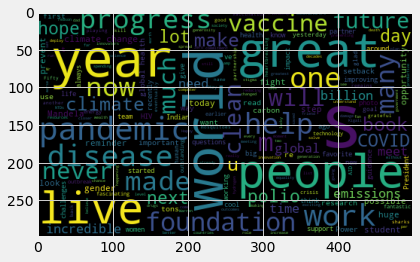

In [14]:
# Word Cloud Visualization
allwords= ' '.join([i for i in df['Tweets']])
Cloud= WordCloud(width=500,height=300,random_state=0,max_font_size=100).generate(allwords)

plt.imshow(Cloud)
plt.show()

In [15]:
# Create a function to compute negative neutral and positive
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'

df['Analysis']= df['Tweet_Polarity'].apply(getAnalysis)
df

,Tweets,Tweet_Subjectivity,Tweet_Polarity,Analysis
0,._pb any tips for my form?,0.000000,0.000000,Neutral
1,"Fifty years ago, I started playing this little...",1.000000,0.250000,Positive
2,"Hey , sharks are cool, but mosquitoes are dead...",0.516667,0.216667,Positive
3,"From Malawi to the United States, new cases of...",0.527273,0.418182,Positive
4,This is heartbreaking. The world had made so m...,0.100000,0.100000,Positive
...,...,...,...,...
95,I had a great time answering questions on yes...,0.625000,0.650000,Positive
96,I’m answering your questions now on :,0.000000,0.000000,Neutral
97,"Hey, , it’s been a while. Ask me anything at 1...",0.000000,0.000000,Neutral
98,This warehouse is cool – for many reasons.,0.575000,0.425000,Positive
